In [4]:
from tensorpowerflow import GridTensor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Load 2 years of data at 30 min resolution (35040 entries)

In [5]:
active_power_time_series = pd.read_csv("data/time_series/active_power_example.csv",
                                       index_col=0,
                                       parse_dates=True)
reactive_power_time_series = pd.read_csv("data/time_series/reactive_power_example.csv",
                                         index_col=0,
                                         parse_dates=True)

Inspect data

Text(0.5, 0, '')

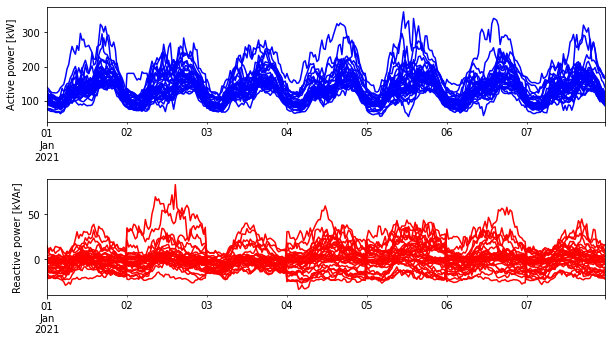

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
plt.subplots_adjust(hspace=0.5, bottom=0.15, top=0.95)
active_power_time_series.head(48 * 7).plot(ax=ax[0], legend=False, color="b")
reactive_power_time_series.head(48 * 7).plot(ax=ax[1], legend=False, color="r")
ax[0].set_ylabel("Active power [kW]")
ax[1].set_ylabel("Reactive power [kVAr]")
ax[0].set_xlabel("")
ax[1].set_xlabel("")

Create the grid

In [9]:
network = GridTensor(node_file_path="data/grid_data/Nodes_34.csv",
                     lines_file_path="data/grid_data/Lines_34.csv")

Numba mode enabled
Compiling JIT functions
Compile time: 6.8083 seconds


Run the power flow for the 35.040 time steps.

In [10]:
solutions = network.run_pf_tensor(active_power=active_power_time_series.values,
                                  reactive_power=reactive_power_time_series.values)

Check the times to run the powerflow

In [16]:
print(f"Time for the PF solution: {solutions['time_pf']:.3f} sec.")
print(f"Time for whole algorithm: {solutions['time_algorithm']:.3f} sec.")

Time for the PF solution: 3.300 sec.
Time for whole algorithm: 3.300 sec.


Plot results of voltage in the first and last node

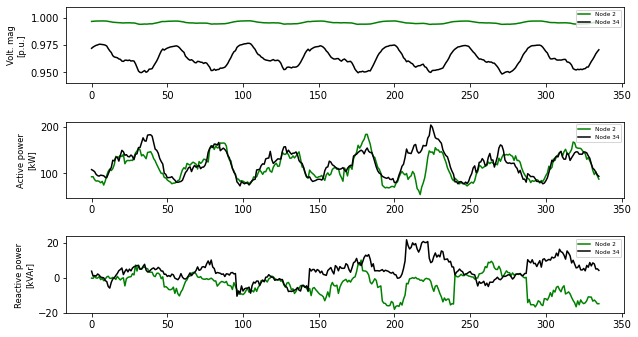

In [17]:
ylabels = ["Volt. mag\n[p.u.]", "Active power\n[kW]", "Reactive power\n[kVAr]"]
fig, ax = plt.subplots(3, 1, figsize=(10, 5))
plt.subplots_adjust(hspace=0.5, bottom=0.1, top=0.95)
ax[0].plot(np.abs(solutions["v"][:(48 * 7), 0]), label="Node 2", color="green")
ax[0].plot(np.abs(solutions["v"][:(48 * 7), 32]), label="Node 34", color="k")
ax[1].plot(active_power_time_series.values[:(48 * 7), 0], label="Node 2", color="green")
ax[1].plot(active_power_time_series.values[:(48 * 7), 32], label="Node 34", color="k")
ax[2].plot(reactive_power_time_series.values[:(48 * 7), 0], label="Node 2", color="green")
ax[2].plot(reactive_power_time_series.values[:(48 * 7), 32], label="Node 34", color="k")
ax[0].set_ylim((0.94, 1.01))
for ax_, ylabel_ in zip(ax, ylabels):
    ax_.legend(loc="upper right", fontsize="xx-small")
    ax_.set_ylabel(ylabel_, fontsize="small")